# Homework 8 

CNN, SimpleRNN, RNN, LSTM, Bidirectional LSTM, GRU를 쓰는 경우
- learning 시간과
- accuracy를 비교하라.

## Presets

In [16]:
%tensorflow_version 2.x

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling2D, Embedding, Flatten, SimpleRNN, LSTM, Bidirectional, GRU
from tensorflow.keras.layers import Reshape, Conv2D, GlobalMaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import optimizers

from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Input

import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


In [0]:
num_features = 5000
sequence_length = 500
embedding_dimension = 100
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_features)
X_train = pad_sequences(X_train, maxlen = sequence_length)
X_test = pad_sequences(X_test, maxlen = sequence_length)

## CNN

In [0]:
filter_sizes = [3, 4, 5]

In [0]:
def convolution():
    inn = Input(shape = (sequence_length, embedding_dimension, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv2D(filters = 100, kernel_size = (fs, embedding_dimension), strides = 1, padding = "valid")(inn)
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (sequence_length - fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpool)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
        
    return model

In [0]:
def imdb_cnn_3():
    
    model = Sequential()
    model.add(Embedding(input_dim = 5000, output_dim = embedding_dimension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))
    
    # call convolution method defined above
    model.add(convolution())
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    adam = optimizers.Adam(lr = 0.001)

    model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
    
    return model

In [6]:
model = imdb_cnn_3()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          500000    
_________________________________________________________________
reshape (Reshape)            (None, 500, 100, 1)       0         
_________________________________________________________________
model (Model)                (None, 1, 1, 300)         120300    
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout (Dropout)            (None, 10)                0

In [7]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
400/400 [==============================] - 10s 24ms/step - loss: 0.5367 - accuracy: 0.6996 - val_loss: 0.3497 - val_accuracy: 0.8554
Epoch 2/10
400/400 [==============================] - 9s 23ms/step - loss: 0.3250 - accuracy: 0.8777 - val_loss: 0.2825 - val_accuracy: 0.8892
Epoch 3/10
400/400 [==============================] - 9s 23ms/step - loss: 0.2468 - accuracy: 0.9180 - val_loss: 0.2628 - val_accuracy: 0.8992
Epoch 4/10
400/400 [==============================] - 9s 23ms/step - loss: 0.1796 - accuracy: 0.9448 - val_loss: 0.3019 - val_accuracy: 0.8926
Epoch 5/10
400/400 [==============================] - 9s 23ms/step - loss: 0.1414 - accuracy: 0.9574 - val_loss: 0.3390 - val_accuracy: 0.8892
Epoch 6/10
400/400 [==============================] - 10s 24ms/step - loss: 0.1051 - accuracy: 0.9682 - val_loss: 0.4038 - val_accuracy: 0.8862
Epoch 7/10
400/400 [==============================] - 9s 23ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.4263 - val_accuracy: 0.88

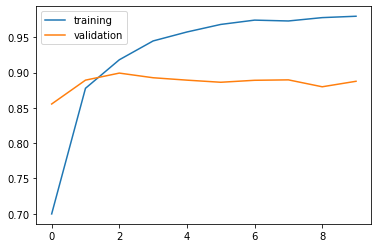

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [9]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

782/782 [==============================] - 5s 6ms/step - loss: 0.7851 - accuracy: 0.8781
Test accuracy:  0.8780800104141235


## SimpleRNN

In [10]:
input_shape = (500, 100)
batch_size = 128
units = 50 # output 갯수
dropout = 0.2

model=Sequential()
model.add(Embedding(input_dim = 5000, output_dim = embedding_dimension, input_length = sequence_length))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 520,201
Trainable params: 520,201
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [12]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
400/400 [==============================] - 101s 253ms/step - loss: 0.6469 - accuracy: 0.5996 - val_loss: 0.6015 - val_accuracy: 0.6718
Epoch 2/10
400/400 [==============================] - 102s 255ms/step - loss: 0.4604 - accuracy: 0.7880 - val_loss: 0.4910 - val_accuracy: 0.7610
Epoch 3/10
400/400 [==============================] - 102s 255ms/step - loss: 0.5288 - accuracy: 0.7218 - val_loss: 0.6371 - val_accuracy: 0.6120
Epoch 4/10
400/400 [==============================] - 102s 256ms/step - loss: 0.5798 - accuracy: 0.6816 - val_loss: 0.6463 - val_accuracy: 0.6160
Epoch 5/10
400/400 [==============================] - 103s 258ms/step - loss: 0.5560 - accuracy: 0.6992 - val_loss: 0.6467 - val_accuracy: 0.6254
Epoch 6/10
400/400 [==============================] - 102s 256ms/step - loss: 0.5168 - accuracy: 0.7315 - val_loss: 0.5841 - val_accuracy: 0.7340
Epoch 7/10
400/400 [==============================] - 103s 257ms/step - loss: 0.4501 - accuracy: 0.7812 - val_loss: 0.5758 -

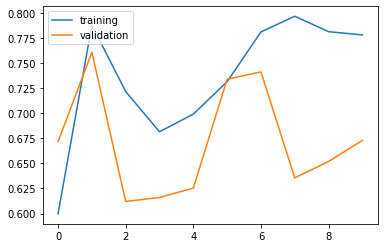

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [14]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

782/782 [==============================] - 26s 34ms/step - loss: 0.6610 - accuracy: 0.6700
Test accuracy:  0.6700400114059448


## RNN

In [17]:
input_shape = (500, 100)
batch_size = 128
units = 50 # output 갯수
dropout = 0.2

class MinimalRNNCell(tf.keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

cell = MinimalRNNCell(32)

model=Sequential()
model.add(Embedding(input_dim = 5000, output_dim = embedding_dimension, input_length = sequence_length))
model.add(tf.keras.layers.RNN(cell))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
rnn_1 (RNN)                  (None, 32)                4224      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 504,257
Trainable params: 504,257
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [19]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
400/400 [==============================] - 87s 217ms/step - loss: 0.6225 - accuracy: 0.7248 - val_loss: 0.6331 - val_accuracy: 0.6176
Epoch 2/10
400/400 [==============================] - 88s 219ms/step - loss: 0.5823 - accuracy: 0.6906 - val_loss: 0.5717 - val_accuracy: 0.6932
Epoch 3/10
400/400 [==============================] - 87s 218ms/step - loss: 0.3609 - accuracy: 0.8402 - val_loss: 0.3642 - val_accuracy: 0.8322
Epoch 4/10
400/400 [==============================] - 85s 214ms/step - loss: 0.2552 - accuracy: 0.8946 - val_loss: 0.3139 - val_accuracy: 0.8688
Epoch 5/10
400/400 [==============================] - 86s 215ms/step - loss: 0.2058 - accuracy: 0.9208 - val_loss: 0.3513 - val_accuracy: 0.8424
Epoch 6/10
400/400 [==============================] - 85s 212ms/step - loss: 0.1887 - accuracy: 0.9281 - val_loss: 0.3738 - val_accuracy: 0.8774
Epoch 7/10
400/400 [==============================] - 83s 209ms/step - loss: 0.1614 - accuracy: 0.9390 - val_loss: 0.3602 - val_ac

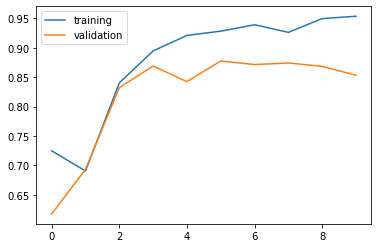

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [21]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

782/782 [==============================] - 21s 26ms/step - loss: 0.4156 - accuracy: 0.8450
Test accuracy:  0.8450000286102295


## LSTM

In [22]:
model=Sequential()
model.add(Embedding(input_dim = 5000, output_dim = embedding_dimension, input_length = sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [24]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
400/400 [==============================] - 14s 36ms/step - loss: 0.4347 - accuracy: 0.7955 - val_loss: 0.3351 - val_accuracy: 0.8660
Epoch 2/10
400/400 [==============================] - 14s 36ms/step - loss: 0.2761 - accuracy: 0.8897 - val_loss: 0.3161 - val_accuracy: 0.8736
Epoch 3/10
400/400 [==============================] - 14s 36ms/step - loss: 0.2247 - accuracy: 0.9129 - val_loss: 0.3197 - val_accuracy: 0.8776
Epoch 4/10
400/400 [==============================] - 14s 36ms/step - loss: 0.1863 - accuracy: 0.9295 - val_loss: 0.3441 - val_accuracy: 0.8578
Epoch 5/10
400/400 [==============================] - 14s 36ms/step - loss: 0.1625 - accuracy: 0.9383 - val_loss: 0.4297 - val_accuracy: 0.8490
Epoch 6/10
400/400 [==============================] - 14s 35ms/step - loss: 0.1367 - accuracy: 0.9488 - val_loss: 0.4796 - val_accuracy: 0.7892
Epoch 7/10
400/400 [==============================] - 14s 36ms/step - loss: 0.1206 - accuracy: 0.9565 - val_loss: 0.4882 - val_accuracy:

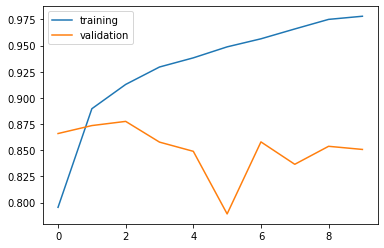

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [26]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

782/782 [==============================] - 9s 11ms/step - loss: 0.5779 - accuracy: 0.8525
Test accuracy:  0.8525199890136719


## Bidirectional LSTM

In [27]:
model=Sequential()
model.add(Embedding(input_dim = 5000, output_dim = embedding_dimension, input_length = sequence_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 661,001
Trainable params: 661,001
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [29]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
400/400 [==============================] - 25s 63ms/step - loss: 0.4777 - accuracy: 0.7685 - val_loss: 0.5350 - val_accuracy: 0.7484
Epoch 2/10
400/400 [==============================] - 24s 61ms/step - loss: 0.3814 - accuracy: 0.8356 - val_loss: 0.3597 - val_accuracy: 0.8466
Epoch 3/10
400/400 [==============================] - 24s 61ms/step - loss: 0.2671 - accuracy: 0.8932 - val_loss: 0.3248 - val_accuracy: 0.8666
Epoch 4/10
400/400 [==============================] - 24s 61ms/step - loss: 0.2061 - accuracy: 0.9207 - val_loss: 0.3494 - val_accuracy: 0.8684
Epoch 5/10
400/400 [==============================] - 24s 61ms/step - loss: 0.1792 - accuracy: 0.9328 - val_loss: 0.3643 - val_accuracy: 0.8486
Epoch 6/10
400/400 [==============================] - 24s 61ms/step - loss: 0.1679 - accuracy: 0.9397 - val_loss: 0.4011 - val_accuracy: 0.8664
Epoch 7/10
400/400 [==============================] - 25s 61ms/step - loss: 0.1457 - accuracy: 0.9460 - val_loss: 0.4617 - val_accuracy:

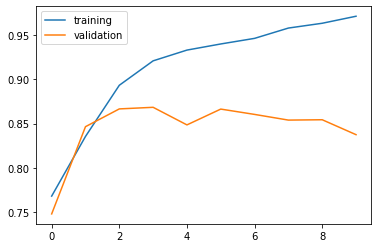

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [31]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

782/782 [==============================] - 15s 19ms/step - loss: 0.5284 - accuracy: 0.8448
Test accuracy:  0.8448399901390076


## GRU

In [32]:
model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = embedding_dimension, input_length = sequence_length))
model.add(GRU(512, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
gru (GRU)                    (None, 512)               943104    
_________________________________________________________________
dense_7 (Dense)              (None, 500)               256500    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 501       
Total params: 1,700,105
Trainable params: 1,700,105
Non-trainable params: 0
_________________________________________________________________


In [0]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [34]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
400/400 [==============================] - 264s 659ms/step - loss: 0.5555 - accuracy: 0.7031 - val_loss: 0.4420 - val_accuracy: 0.7836
Epoch 2/10
400/400 [==============================] - 261s 653ms/step - loss: 0.3902 - accuracy: 0.8231 - val_loss: 0.3504 - val_accuracy: 0.8456
Epoch 3/10
400/400 [==============================] - 261s 652ms/step - loss: 0.2152 - accuracy: 0.9147 - val_loss: 0.2670 - val_accuracy: 0.8866
Epoch 4/10
400/400 [==============================] - 262s 655ms/step - loss: 0.1531 - accuracy: 0.9428 - val_loss: 0.2930 - val_accuracy: 0.8874
Epoch 5/10
400/400 [==============================] - 260s 650ms/step - loss: 0.1094 - accuracy: 0.9614 - val_loss: 0.3382 - val_accuracy: 0.8808
Epoch 6/10
400/400 [==============================] - 262s 655ms/step - loss: 0.0772 - accuracy: 0.9720 - val_loss: 0.4466 - val_accuracy: 0.8720
Epoch 7/10
400/400 [==============================] - 261s 653ms/step - loss: 0.0624 - accuracy: 0.9783 - val_loss: 0.4474 -

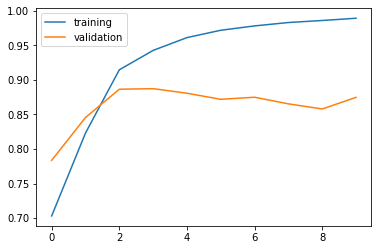

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [36]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

782/782 [==============================] - 80s 102ms/step - loss: 0.6241 - accuracy: 0.8722
Test accuracy:  0.8722400069236755


## 정리

1. CNN: 1m 35s / 87%
2. SimpleRNN: 17m 7s / 67%
3. RNN: 14m 6s / 84%
4. LSTM: 2m 24s / 85%
5. Bidirectional LSTM: 4m 8s / 84%
6. GRU: 43m 42s / 87%